In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [4]:
Analysis_Framework = pd.read_csv("titanic-train.csv")
dataset_titanic = pd.DataFrame(Analysis_Framework)

In [22]:
dataset_titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
#pour regarder les types de colones
dataset_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

note: sexe est un string donc on convertit en entier: 0 pour les males, et 1 pour les femelles

In [24]:

dataset_titanic['Sex'] = dataset_titanic['Sex'].replace('male',0)
dataset_titanic['Sex'] = dataset_titanic['Sex'].replace('female',1)

Je decide de numériser la colone Embarked, <br>
tel que C=1, Q=2 et S=3

In [25]:
dataset_titanic['Embarked'] = dataset_titanic['Embarked'].replace('C',1)
dataset_titanic['Embarked'] = dataset_titanic['Embarked'].replace('Q',2)
dataset_titanic['Embarked'] = dataset_titanic['Embarked'].replace('S',3)


verification des nan ou remplacements

In [10]:
dataset_titanic.isnull()['Survived']


0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Survived, Length: 891, dtype: bool

In [27]:
#remarque la colonne Age possède 177 NaN, choix de les remplacer par la mediane
dataset_titanic['Age'].fillna(dataset_titanic['Age'].median(), inplace = True)
#Il n'y a que 2 embarked NaN, donc je supprime ces deux lignes
index= dataset_titanic[ (dataset_titanic['Embarked']!=1) & (dataset_titanic['Embarked']!=2) & (dataset_titanic['Embarked']!=3)  ].index
print(index)
dataset_titanic.drop(index,inplace=True)
display(dataset_titanic)

#la colonne Cabin possède beaucoup de NaN je choisis donc de la supprimer
dataset_titanic=dataset_titanic.drop('Cabin', axis=1)


#Suppression des colonnes name et ticket 
# car ce ne sont pas des valeurs numériques et je ne vais pas m'en servir pour la suite
dataset_titanic=dataset_titanic.drop(['Name'],axis=1)
dataset_titanic=dataset_titanic.drop(['Ticket'],axis=1)


Int64Index([61, 829], dtype='int64')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,3.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,3.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,3.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,NaN,3.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1.0


Dictionnaire des colones:
Label    Intitulé
survival    Survival (0 = No; 1 = Yes)
pclass    Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name    Name
sex    Sex
age    Age
sibsp    Nombre de frere et soeur/ conjoint à bord
parch    Nombre de parent/d'enfants a bord 
ticket    Ticket Number
fare    Passenger Fare (tarif)
cabin    Cabin
embarked    Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

Analyse du dataset

<AxesSubplot: >

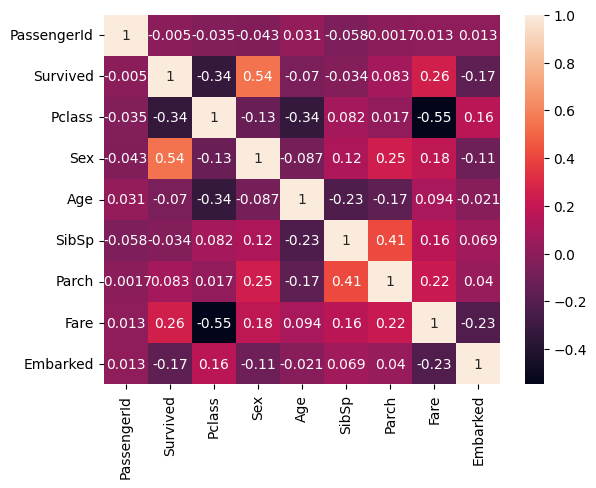

In [28]:
#on regarde les corrélations entre chaque colone du dataset, 
corrMatrix = dataset_titanic.corr()
sn.heatmap(corrMatrix, annot=True)

Note: on remarque que les fortes corrélations sont entre les colones: Survived-Pclass, Survived-Sex, Survived-Fare pour la sortie (Survived), mais aussi entre Pclass-Age, Fare-Pclass.

On choisira d'étudier en priorité les facteurs corrélés à la sortie, de plus Fare étant le prix du billet, il est relatif à la classe, ainsi la corrélation négative se justifie par le fait que plus la classe est proche de 1, plus le prix du billet (fare) augmente. 

Analyse univarié


In [29]:
#Age 
query = '''SELECT avg(Age) As "average Age" , "Survived"  
FROM dataset_titanic
Group By "Survived"   
;'''
q1 = pysqldf(query)
q1

,average Age,Survived
0,30.028233,0
1,28.163735,1


<AxesSubplot: xlabel='Survived'>

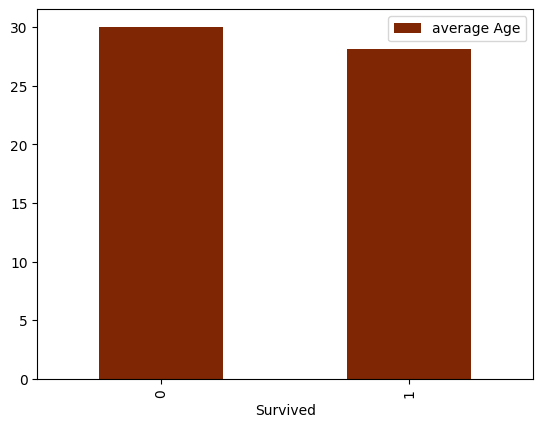

In [30]:
q1.plot.bar(x='Survived', y='average Age' , colormap='Oranges_r')


On remarque qu'il n'y a pas une grande différence d'age entre la population décédé et celle qui a survécu, ainsi la variable Age ne sera pas forcément très utile à garder. Cela est logique car sur la matrice de corrélation, la valeur entre 'Age' et 'Survived' est proche de 0

De plus la colone 'Age', possèdait un nombre non négligeable de NaN que j'ai du remplacer par la médian, ainsi la qualité de cette colone a été "endomagé".

In [31]:
#on regarde Pclass
# 
# Préparation des données 
#pour p1
p1= dataset_titanic[dataset_titanic['Pclass']==1]
survivors_p1=p1[dataset_titanic['Survived']==1]
dead_p1= p1[dataset_titanic['Survived']==0]
#pour p2
p2= dataset_titanic[dataset_titanic['Pclass']==2]
survivors_p2=p2[dataset_titanic['Survived']==1]
dead_p2= p2[dataset_titanic['Survived']==0]

#pour p3
p3= dataset_titanic[dataset_titanic['Pclass']==3]
survivors_p3=p3[dataset_titanic['Survived']==1]
dead_p3= p3[dataset_titanic['Survived']==0]

survivors= [len(survivors_p1),len(survivors_p2),len(survivors_p3)]
dead=[len(dead_p1),len(dead_p2),len(dead_p3)]



D:\rayan\pip\ipykernel_51944\3617300141.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivors_p1=p1[dataset_titanic['Survived']==1]
D:\rayan\pip\ipykernel_51944\3617300141.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dead_p1= p1[dataset_titanic['Survived']==0]
D:\rayan\pip\ipykernel_51944\3617300141.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivors_p2=p2[dataset_titanic['Survived']==1]
D:\rayan\pip\ipykernel_51944\3617300141.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dead_p2= p2[dataset_titanic['Survived']==0]
D:\rayan\pip\ipykernel_51944\3617300141.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivors_p3=p3[dataset_titanic['Survived']==1]
D:\rayan\pip\ipykernel_51944\3617300141.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dead_p3= p3[dataset_

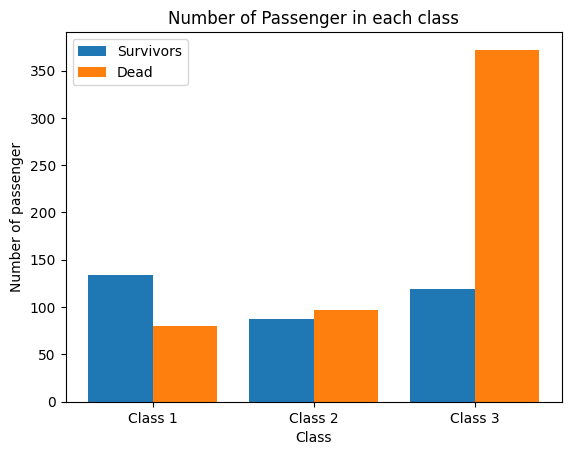

In [32]:
#affichage des survivants par class
X = ['Class 1','Class 2','Class 3']

if len(survivors) == len(dead):
    X_axis = np.arange(len(survivors))
  
plt.bar(X_axis - 0.2, survivors, 0.4, label = 'Survivors')
plt.bar(X_axis + 0.2, dead, 0.4, label = 'Dead')
  
plt.xticks(X_axis, X)
plt.xlabel("Class")
plt.ylabel("Number of passenger")
plt.title("Number of Passenger in each class")
plt.legend()
plt.show()

On remarque qu'il y a beaucoup plus de passage dans la troisième classe, mais que le nombre de survivant est supérieur dans la première class, cependant le nombre de survivant dans la seconde classe est le plus bas. Pour nous assurer que le facteur Pclass peut être prit en compte il faudrait plutot regarder le pourcentage de survivant par classe. Comme on a pu le voir sur la matrice de corrélation plus haut, il y a une forte corrélation négative entre 'Survived' et Pclass, on peut supposer qu'en terme de pourcentage plus on se rapproche de la première classe, plus le nombre de survivants augmentent.

Text(0.5, 1.0, 'Third Class')

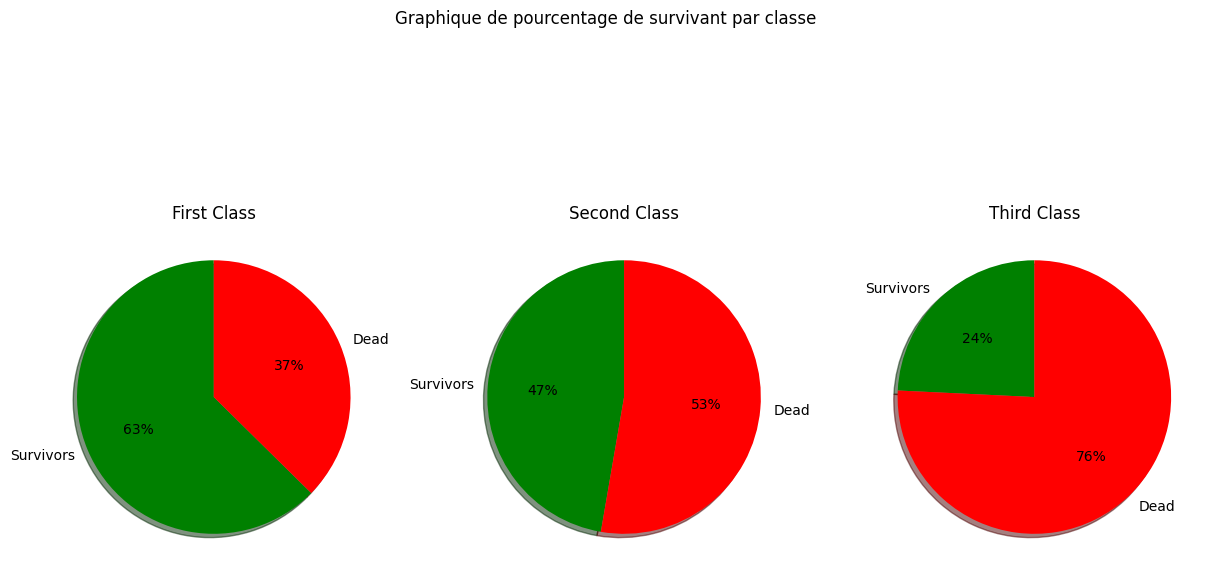

In [33]:
#Graphique donut:


pourcentage_survivant_p1= (survivors[0]/len(p1))*100
pourcentage_survivant_p2= (survivors[1]/len(p2))*100
pourcentage_survivant_p3= (survivors[2]/len(p3))*100


name = ['Survivors','Dead']
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(15,8))
fig.suptitle('Graphique de pourcentage de survivant par classe')
ax1.pie([pourcentage_survivant_p1,100-pourcentage_survivant_p1], labels=name, autopct='%0.f%%', colors = ['green','red'], shadow=True, startangle=90)
ax1.set_title('First Class')

ax2.pie([pourcentage_survivant_p2,100-pourcentage_survivant_p2], labels=name, autopct='%0.f%%', colors = ['green','red'], shadow=True, startangle=90)
ax2.set_title('Second Class')

ax3.pie([pourcentage_survivant_p3,100-pourcentage_survivant_p3], labels=name, autopct='%0.f%%', colors = ['green','red'], shadow=True, startangle=90)
ax3.set_title('Third Class')

On remarque bien que plus on s'éloigne de la première classe, plus le nombre de décès augmente, ainsi on peut donc conclure que la class d'un passager constitue un facteur important.

On peut également regarder le nombre de survivant en fonction du genre

In [34]:
#Préparation des données

female= dataset_titanic[dataset_titanic['Sex']==1]
female_survivors = female[female['Survived']==1]

male=dataset_titanic[dataset_titanic['Sex']==0]
male_survivors = male[male['Survived']==1]

survivors_by_genre=[len(male_survivors),len(female_survivors)]
dead_by_genre=[len(male)-len(male_survivors),len(female)-len(female_survivors)]



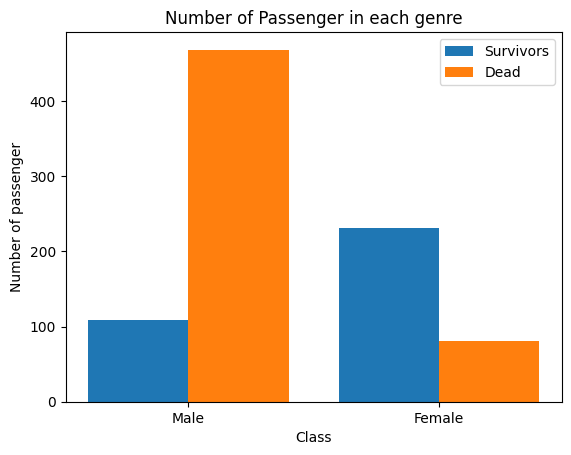

In [35]:
#affichage des survivants par genre
X = ['Male','Female']

if len(survivors_by_genre) == len(dead_by_genre):
    X_axis = np.arange(len(survivors_by_genre))
  
plt.bar(X_axis - 0.2, survivors_by_genre, 0.4, label = 'Survivors')
plt.bar(X_axis + 0.2, dead_by_genre, 0.4, label = 'Dead')
  
plt.xticks(X_axis, X)
plt.xlabel("Class")
plt.ylabel("Number of passenger")
plt.title("Number of Passenger in each genre")
plt.legend()

On remarque que le nombre de femmes qui survivent est bien supérieur au nombre d'hommes qui survivent alors qu'il y a plus de passager masculin. 


On peut réaliser un graphique donut afin de voir le pourcentage de survivant parmi chaque genre

Text(0.5, 1.0, 'Female')

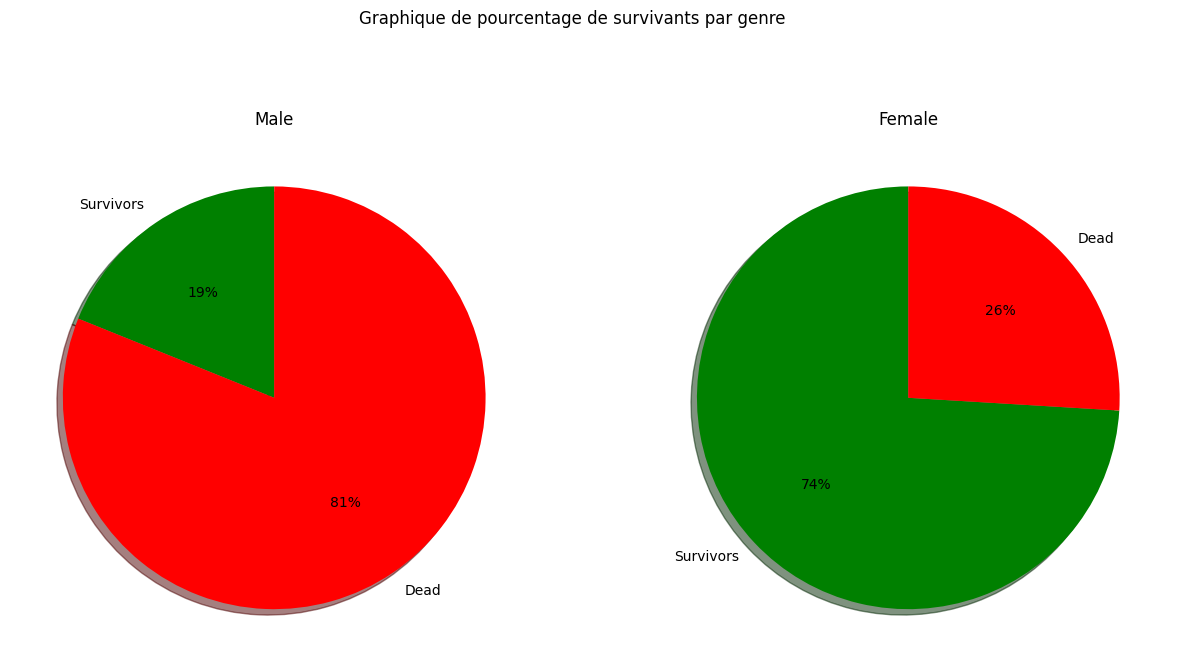

In [36]:
#Graphique donut:
pourcentage_survivant_male= (survivors_by_genre[0]/len(male))*100
pourcentage_survivant_female= (survivors_by_genre[1]/len(female))*100


name = ['Survivors','Dead']
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,8))
fig.suptitle('Graphique de pourcentage de survivants par genre')
ax1.pie([pourcentage_survivant_male,100-pourcentage_survivant_male], labels=name, autopct='%0.f%%', colors = ['green','red'], shadow=True, startangle=90)
ax1.set_title('Male')

ax2.pie([pourcentage_survivant_female,100-pourcentage_survivant_female], labels=name, autopct='%0.f%%', colors = ['green','red'], shadow=True, startangle=90)
ax2.set_title('Female')

On constate que le pourcentage de décès chez les individus masculins est bien supérieur à celui des femmes. 
On peut donc conclure que le genre est un facteur à prendre en compte dans le cas de l'apprentissage d'un modèle. 

Maintenant on peut regarder le lien entre le prix du billet et son influence sur la survie des passagers. Même si le facteur Fare est lié au facteur Pclass vu que le prix du billet dépend de sa classe, ça peut être intérressant de le regarder.

In [37]:
from numpy import mean
#Préparation des données
survivors= dataset_titanic[dataset_titanic['Survived']==1]
dead= dataset_titanic[dataset_titanic['Survived']==0]
mean_price_survivors= mean(survivors['Fare'])
mean_price_dead=mean(dead['Fare'])


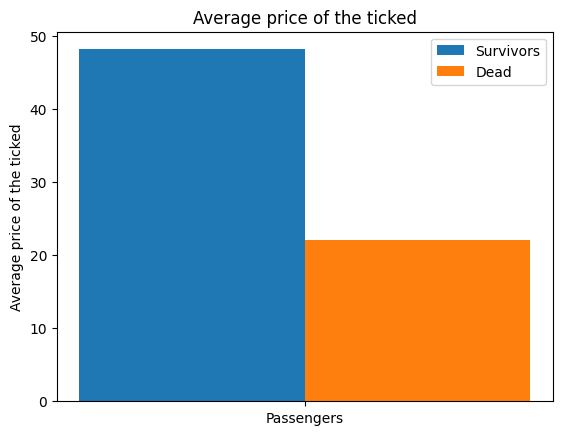

In [38]:
#affichage des survivants par moyenne de prix de billet 
X = ['Passengers']

X_axis = np.arange(1)
  
plt.bar(X_axis - 0.2, mean_price_survivors, 0.4, label = 'Survivors')
plt.bar(X_axis + 0.2, mean_price_dead, 0.4, label = 'Dead')
  
plt.xticks(X_axis, X)
plt.ylabel("Average price of the ticked")
plt.title("Average price of the ticked")
plt.legend()

On remarque que le prix moyen du billet d'un survivant est presque deux fois suppérieur à celui d'un pasager décédé. Il y a donc bien une corrélation et on pourra utiliser ce facteur dans un modèle de prédiction avec en sortie le facteur 'Survived'.

### Conclusion de l'analyse

Suite à cette rapide analyse, on pourrait imaginer un premier modèle prédicif, qui prendrais en variable les facteurs 'Sex', 'Fare' et 'Pclass', avec en sortie la colonne 'Survived' (0 ou 1).